# face recognition using image and video

## prerequisite
- python3
- install dlib (baseline) https://gist.github.com/ageitgey/629d75c1baac34dfa5ca2a1928a7aeaf
- pip3 install face_recognition

Get face information inside a picture

[(206, 740, 527, 419), (455, 1026, 776, 705), (342, 813, 378, 777), (218, 1169, 254, 1133)]


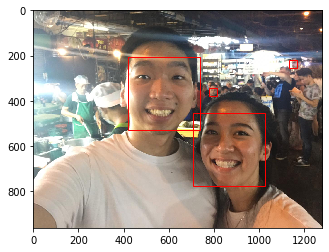

In [1]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

image = face_recognition.load_image_file("potrait/yoedi-levina.jpeg")
face_landmarks_list = face_recognition.face_landmarks(image)
face_locations = face_recognition.face_locations(image)

print(face_locations)

def get_face_rect(face_locations):
    top, right, bottom, left = face_locations
    x = left
    y = bottom
    width = right-left
    height = top-bottom
    return Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')

for face_location in face_locations:
    rect = get_face_rect(face_location)
    plt.gca().add_patch(rect)
    plt.imshow(image)

Compare between 2 images, second images consist many face picture

[(414, 844, 522, 736), (383, 640, 512, 511), (418, 446, 470, 394), (435, 1137, 487, 1086), (446, 961, 482, 925), (458, 73, 494, 37)]
[True]
True
False
False
False
False
False


6

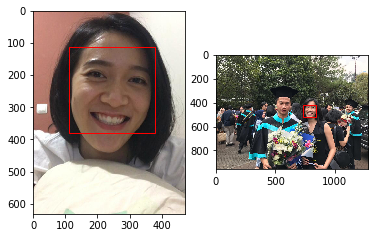

In [5]:
known_image = face_recognition.load_image_file("potrait/levina.jpeg")
unknown_image = face_recognition.load_image_file("potrait/wisuda-bobby.jpeg")

print(face_recognition.face_locations(unknown_image))

known_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([known_encoding], unknown_encoding)
print(results)

# show known image
plt.subplot(1,2,1)
rect = get_face_rect(face_recognition.face_locations(known_image)[0])
plt.gca().add_patch(rect)
plt.imshow(known_image)

# get person image in collections of encoding
i=0
for unknown_encode in face_recognition.face_encodings(unknown_image):
    print(face_recognition.compare_faces([known_encoding], unknown_encode, 0.45)[0])
    if face_recognition.compare_faces([known_encoding], unknown_encode, 0.45)[0]:
        plt.subplot(1,2,2)
        rect = get_face_rect(face_recognition.face_locations(unknown_image)[i])
        plt.gca().add_patch(rect)
        plt.imshow(unknown_image)
#         break
    i = i + 1
i